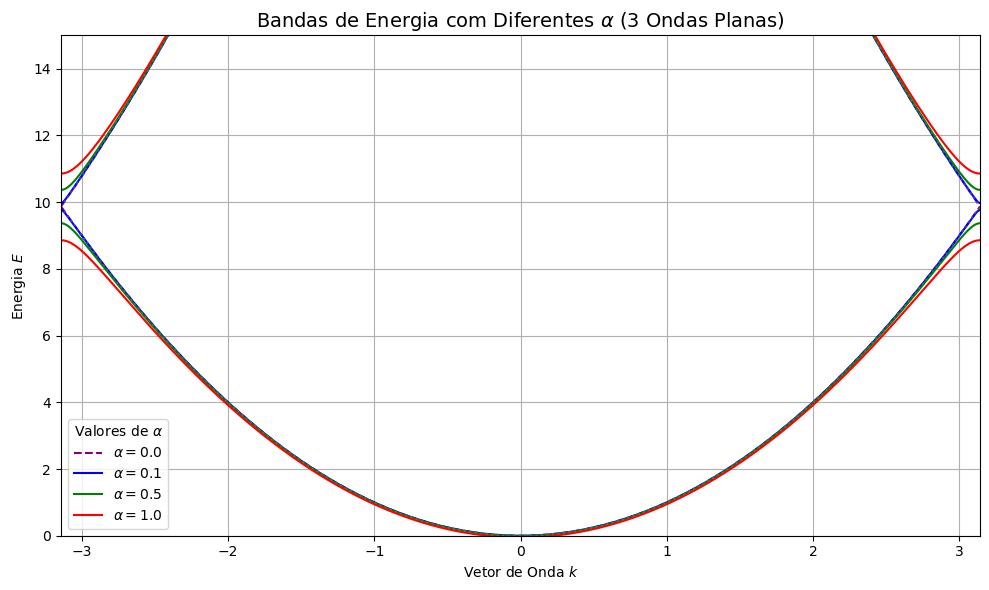

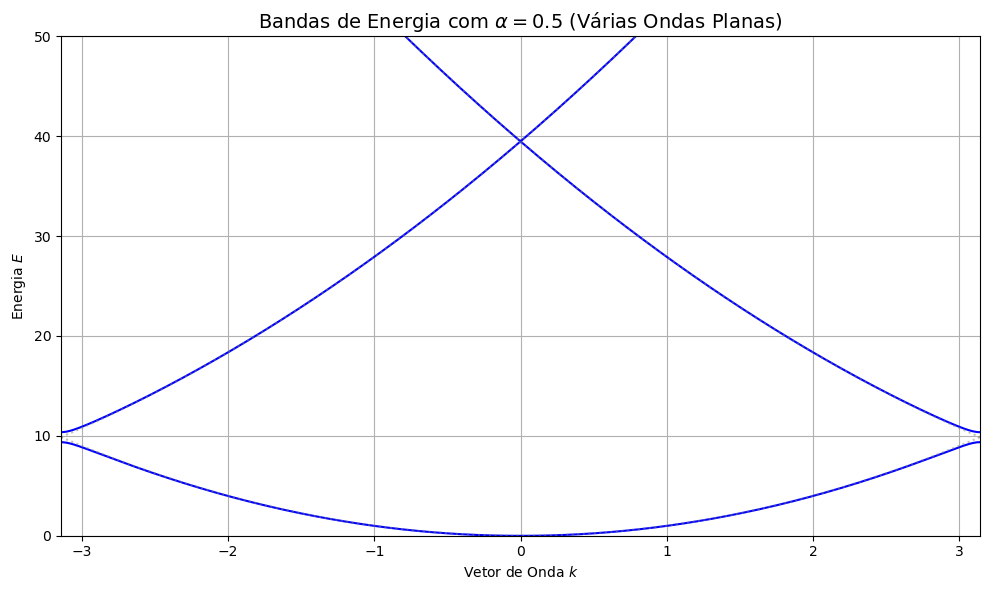

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def solve_hamiltonian(k_points, alpha, num_plane_waves):
    """
    Diagonaliza o Hamiltoniano para cada ponto k na Primeira Zona de Brillouin.

    Args:
        k_points (np.array): Array de pontos k na Primeira Zona de Brillouin.
        alpha (float): Intensidade do potencial.
        num_plane_waves (int): Número de ondas planas G a serem consideradas (2N+1).

    Returns:
        np.array: Array 2D contendo as energias (autovalores) para cada k.
    """
    energies = []
    
    # Gerar os vetores G_n para o número de ondas planas especificado
    # G_n = 2 * pi * n, onde n varia de -N a N
    # Por exemplo, para num_plane_waves = 3, n_values = [-1, 0, 1]
    # Para num_plane_waves = 5, n_values = [-2, -1, 0, 1, 2]
    n_values = np.arange(-(num_plane_waves // 2), num_plane_waves // 2 + 1)
    G_vectors = 2 * np.pi * n_values

    for k in k_points:
        # Cria a matriz do Hamiltoniano tridiagonal
        H = np.zeros((num_plane_waves, num_plane_waves))

        for i in range(num_plane_waves):
            # Elementos diagonais: lambda_k-G_n = |k - G_n|^2
            H[i, i] = (k - G_vectors[i])**2

            # Elementos fora da diagonal (acoplamentos sucessivos)
            # Acoplamento com G_{n-1}
            if i > 0:
                H[i, i-1] = alpha
            # Acoplamento com G_{n+1}
            if i < num_plane_waves - 1:
                H[i, i+1] = alpha
        
        # Diagonaliza o Hamiltoniano para encontrar os autovalores (energias)
        # As energias são ordenadas automaticamente em ordem crescente
        eigenvalues = np.linalg.eigvalsh(H)
        energies.append(eigenvalues)
    
    return np.array(energies)

# --- Parâmetros ---
# Primeira Zona de Brillouin: -pi < k <= pi
k_min = -np.pi
k_max = np.pi
num_k_points = 500  # Número de pontos k para a discretização
k_points = np.linspace(k_min, k_max, num_k_points)

# --- Configurações para os gráficos ---
# Para Figura 5.14: Variação de alpha com poucas ondas planas (ex: 3 ou 5)
# Para Figura 5.17/9.4: Alpha fixo com muitas ondas planas (ex: 9, 11, 13 ou mais)

# Exemplo para replicar Figura 5.14 (foco nos gaps na 1ª ZB)
plt.figure(figsize=(10, 6))
plt.title('Bandas de Energia com Diferentes $\\alpha$ (3 Ondas Planas)', fontsize=14)
plt.xlabel('Vetor de Onda $k$')
plt.ylabel('Energia $E$')
plt.xlim(k_min, k_max)
plt.grid(True)

# Testar com um número pequeno de ondas planas para ver os gaps iniciais
# Usaremos 3 ondas planas para começar (-2pi, 0, 2pi), ou seja, n = -1, 0, 1
# Para isso, num_plane_waves = 3 (ou seja, N=1, com n de -1 a 1)
# O enunciado fala em "acoplamentos entre ondas planas sucessivas", o que implica que
# um H(k) de 3x3 já é o suficiente para mostrar o gap fundamental.
# No entanto, para ver a "curvatura" do elétron quase-livre, precisamos de mais.
# Vamos usar 5 ondas planas (n = -2, -1, 0, 1, 2)
num_pw_for_5_14 = 5 # Ajuste este valor se for necessário

# Valores de alpha para o primeiro gráfico
alphas_fig_5_14 = [0.0, 0.1, 0.5, 1.0] # Incluímos alpha=0 para ver as parábolas puras

colors = ['purple', 'blue', 'green', 'red'] # Cores para as diferentes alphas

for idx, alpha_val in enumerate(alphas_fig_5_14):
    band_energies = solve_hamiltonian(k_points, alpha_val, num_pw_for_5_14)
    for band_idx in range(num_pw_for_5_14):
        # Apenas plotamos as 3 primeiras bandas que são mais relevantes para o gap principal
        # No modo de elétron quase-livre (zona reduzida), as bandas são "redobradas"
        # Precisamos selecionar as bandas que formam a figura de interesse.
        # Geralmente são as duas primeiras bandas que mostram o gap em pi.
        # Para um Hamiltoniano 5x5, teremos 5 bandas.
        # A forma como as bandas são plotadas pode ser crucial.

        # Para um Hamiltoniano 5x5, as bandas principais que formam o gap em pi
        # são a banda 0 e a banda 1 (primeiro gap)
        # e depois a banda 1 e a banda 2 (segundo gap) e assim por diante.
        # Vamos plotar todas as bandas para ver o comportamento geral.
        plt.plot(k_points, band_energies[:, band_idx], color=colors[idx], linestyle='-' if alpha_val > 0 else '--', label=f'$\\alpha={alpha_val}$' if band_idx == 0 else "") # Apenas uma legenda por alpha

# Adicionar as parábolas de elétron livre para contexto
# As parábolas representam os estados de elétron livre (sem potencial)
# plotamos algumas que interceptam a primeira ZB
n_values_for_ref = np.arange(-(num_pw_for_5_14 // 2), num_pw_for_5_14 // 2 + 1)
for n in n_values_for_ref:
    plt.plot(k_points, (k_points - 2 * np.pi * n)**2, ':', color='gray', alpha=0.5)

# Remover legendas duplicadas e ajustar.
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(ul)] for ul in unique_labels]
plt.legend(unique_handles, unique_labels, title="Valores de $\\alpha$")
plt.ylim(0, 15) # Ajusta o limite Y para focar no gap principal
plt.tight_layout()
plt.show()

# Exemplo para replicar Figura 5.17/9.4 (muitas ondas planas, alpha fixo)
plt.figure(figsize=(10, 6))
plt.title('Bandas de Energia com $\\alpha=0.5$ (Várias Ondas Planas)', fontsize=14)
plt.xlabel('Vetor de Onda $k$')
plt.ylabel('Energia $E$')
plt.xlim(k_min, k_max)
plt.grid(True)

# Um valor de alpha fixo para o segundo gráfico
fixed_alpha_fig_5_17 = 0.5 # Pode ser ajustado

# Um número maior de ondas planas para ver mais bandas
num_pw_for_5_17 = 17 # Tente 9, 11, 13 ou até mais para ver mais bandas
                     # Isso gera uma matriz 13x13 e 13 bandas

band_energies_5_17 = solve_hamiltonian(k_points, fixed_alpha_fig_5_17, num_pw_for_5_17)

for band_idx in range(num_pw_for_5_17):
    plt.plot(k_points, band_energies_5_17[:, band_idx], color='blue') # Todas as bandas na mesma cor para simplicidade

# Adicionar as parábolas de elétron livre para contexto
n_values_for_ref_5_17 = np.arange(-(num_pw_for_5_17 // 2), num_pw_for_5_17 // 2 + 1)
for n in n_values_for_ref_5_17:
    plt.plot(k_points, (k_points - 2 * np.pi * n)**2, ':', color='gray', alpha=0.5)

plt.ylim(0, 50) # Ajusta o limite Y para ver mais bandas
plt.tight_layout()
plt.show()